# Data Preprocessing

In [ ]:
import csv
import requests
import xml.etree.ElementTree as ET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
xmlfile = 'drive/MyDrive/Rad-SpRL.xml'

tree = ET.parse(xmlfile)
root = tree.getroot()

rows = []

sp_count = 0
traj_count = 0
land_count = 0
diag_count = 0
hedge_count = 0

sp_con = 0
max_sp = 0
tl_con = 0
tld_con = 0
tlh_con = 0
all_con = 0
md_count = 0
max_d = 0

for item in root:

  text = ""

  i_sp_count = 0
  i_traj_count = 0
  i_land_count = 0
  i_diag_count = 0
  i_hedge_count = 0

  for child in item:
    if child.tag == "Text":
      text = child.text

  for child in item:
    if child.tag == "Annotations":
      tokens = {}
      token_chars = {}

      token_count = 0


      relations = {}

      for body in child:
        if body.tag == "Token":
          tokens[token_count] = text[int(body.attrib['cs']):int(body.attrib['cs'])+int(body.attrib['cl'])]
          token_count += 1

        elif body.tag == "RadSpRLRelation":
          start_count = 0
           
          for mul in body.attrib["ts"].split(','):
            length_arr = body.attrib["tl"].split(',')
            relations[int(mul)] = "B-SPATIAL_IND"
            sp_count += 1
            i_sp_count += 1
            for i in range(1, int(length_arr[start_count])):
              relations[int(mul)+i] = "I-SPATIAL_IND"
            start_count += 1


          for spatial in body:

            start_count = 0
           
            for mul in spatial.attrib["ts"].split(','):
              length_arr = spatial.attrib["tl"].split(',')
              relations[int(mul)] = "B-" + spatial.tag


              if spatial.tag == "Trajector":
                traj_count += 1
                i_traj_count += 1
              
              elif spatial.tag == "Landmark":
                land_count += 1
                i_land_count += 1

              elif spatial.tag == "Diagnosis":
                diag_count += 1
                i_diag_count += 1

              elif spatial.tag == "Hedge":
                hedge_count += 1
                i_hedge_count += 1

              for i in range(1, int(length_arr[start_count])):
                relations[int(mul)+i] = "I-" + spatial.tag
                  
              start_count += 1

      conll = []

      for i in tokens:
        if i in relations:
          conll.append((tokens[i], relations[i]))
        else:
          conll.append((tokens[i], "O"))

    if i_sp_count > 0:
      sp_con += 1
    
    if i_sp_count > max_sp:
      max_sp = i_sp_count 
    
    if i_traj_count > 0 and i_land_count > 0 and i_diag_count == 0 and i_hedge_count == 0:
      tl_con += 1
    
    if i_traj_count > 0 and i_land_count > 0 and i_diag_count > 0 and i_hedge_count == 0:
      tld_con += 1
    
    if i_traj_count > 0 and i_land_count > 0 and i_diag_count == 0 and i_hedge_count > 0:
      tlh_con += 1
    
    if i_traj_count > 0 and i_land_count > 0 and i_diag_count > 0 and i_hedge_count > 0:
      all_con += 1
    
    if i_diag_count > 1:
      md_count += 1
    
    if i_diag_count > max_d:
      max_d = i_diag_count
  
  rows.append(conll)

In [ ]:
len(rows)

2000

In [ ]:
print("TOTAL SPATIAL:", sp_count)
print("TOTAL TRAJECTORY:", traj_count)
print("TOTAL LANDMARK:", land_count)
print("TOTAL DIAGONAL:", diag_count)
print("TOTAL HEDGE:", hedge_count)
print("DOCUMENTS CONTAINING SPATIAL INDICATOR:", sp_con)
print("MAXIMUM NUMBER OF SPATIAL INDICATOR IN A DOCUMENT:", max_sp)
print("DOCUMENTS CONTAINING TRAJECTORY AND LANDMARK ONLY:", tl_con)
print("DOCUMENTS CONTAINING TRAJECTORY LANDMARK AND DIAGNOSIS ONLY:", tld_con)
print("DOCUMENTS CONTAINING TRAJECTORY LANDMARK AND HEDGE ONLY:", tlh_con)
print("DOCUMENTS CONTAINING TRAJECTORY LANDMARK DIAGNOSIS AND HEDGE:", all_con)
print("DOCUMENTS CONTAINING DIAGNOSIS:", md_count)
print("MAXIMUM NUMBER OF DIAGNOSIS IN A DOCUMENT:", max_d)

TOTAL SPATIAL: 2028
TOTAL TRAJECTORY: 2293
TOTAL LANDMARK: 2167
TOTAL DIAGONAL: 455
TOTAL HEDGE: 388
DOCUMENTS CONTAINING SPATIAL INDICATOR: 1062
MAXIMUM NUMBER OF SPATIAL INDICATOR IN A DOCUMENT: 13
DOCUMENTS CONTAINING TRAJECTORY AND LANDMARK ONLY: 742
DOCUMENTS CONTAINING TRAJECTORY LANDMARK AND DIAGNOSIS ONLY: 6
DOCUMENTS CONTAINING TRAJECTORY LANDMARK AND HEDGE ONLY: 44
DOCUMENTS CONTAINING TRAJECTORY LANDMARK DIAGNOSIS AND HEDGE: 259
DOCUMENTS CONTAINING DIAGNOSIS: 124
MAXIMUM NUMBER OF DIAGNOSIS IN A DOCUMENT: 6


In [ ]:
flag = False

for row in rows:
  if flag == True:
    print("--------------------------")
  flag = False
  for token in row:
    if flag == True:
      print(token, end=" ")
    if token[0] == "emphysematous":
      print(token, end=" ")
      flag = True

('emphysematous', 'O') ('disease', 'O') ('.', 'O') ('The', 'O') ('calcified', 'O') ('granulomas', 'O') ('are', 'O') ('stable', 'O') ('.', 'O') ('Transcribed', 'O') ('by', 'O') ('-', 'O') ('PSC', 'O') ('Transcription', 'O') ('Date', 'O') ('-', 'O') ('XXXX', 'O') ('IMPRESSION', 'O') ('1', 'O') ('.', 'O') ('Changes', 'O') ('of', 'O') ('emphysema', 'O') ('and', 'O') ('left', 'O') ('lower', 'O') ('lobe', 'O') ('scarring', 'O') (',', 'O') ('both', 'O') ('stable', 'O') ('.', 'O') ('2', 'O') ('.', 'O') ('Unchanged', 'O') ('degenerative', 'B-Trajector') ('and', 'O') ('atherosclerotic', 'B-Trajector') ('changes', 'I-Trajector') ('of', 'B-SPATIAL_IND') ('the', 'O') ('thoracic', 'B-Landmark') ('aorta', 'I-Landmark') ('.', 'O') ('SIGNATURE', 'O') ('XXXX', 'O') --------------------------
('emphysematous', 'O') ('changes', 'O') ('are', 'O') ('noted', 'O') ('.', 'O') ('Transcribed', 'O') ('by', 'O') ('-', 'O') ('PSC', 'O') ('Transcription', 'O') ('Date', 'O') ('-', 'O') ('XXXX', 'O') ('IMPRESSION', 'O

In [ ]:
import pandas as pd

In [ ]:
for row in rows:
  print(row)

[('Chest', 'O'), ('PA', 'O'), ('-', 'O'), ('Lat', 'O'), ('XR', 'O'), ('Imaging', 'O'), ('Study', 'O'), ('Xray', 'O'), ('Chest', 'O'), ('PA', 'O'), ('and', 'O'), ('Lateral', 'O'), ('Exam', 'O'), (':', 'O'), ('2', 'O'), ('views', 'O'), ('of', 'O'), ('the', 'O'), ('chest', 'O'), ('XXXX', 'O'), ('/', 'O'), ('XXXX', 'O'), ('.', 'O'), ('Comparison', 'O'), (':', 'O'), ('None', 'O'), ('.', 'O'), ('Indication', 'O'), (':', 'O'), ('Positive', 'O'), ('TB', 'O'), ('test', 'O'), ('Findings', 'O'), (':', 'O'), ('The', 'O'), ('cardiac', 'O'), ('silhouette', 'O'), ('and', 'O'), ('mediastinum', 'O'), ('size', 'O'), ('are', 'O'), ('within', 'O'), ('normal', 'O'), ('limits', 'O'), ('.', 'O'), ('There', 'O'), ('is', 'O'), ('no', 'O'), ('pulmonary', 'O'), ('edema', 'O'), ('.', 'O'), ('There', 'O'), ('is', 'O'), ('no', 'O'), ('focal', 'O'), ('consolidation', 'O'), ('.', 'O'), ('There', 'O'), ('are', 'O'), ('no', 'O'), ('XXXX', 'O'), ('of', 'O'), ('a', 'O'), ('pleural', 'O'), ('effusion', 'O'), ('.', 'O'), (

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
MAX_SENTENCE = -1

for row in rows:
  if len(row) > MAX_SENTENCE:
    MAX_SENTENCE = len(row)

In [ ]:
print(MAX_SENTENCE)

343


In [ ]:
tokens = []
labels = []
documentid = []

id = 0

for row in rows:
  for token in row:
    tokens.append(token[0])
    labels.append(token[1])
    documentid.append(id)
  id += 1

In [ ]:
len(tokens)

201572

In [ ]:
len(labels)

201572

In [ ]:
df = pd.DataFrame({'Tokens':tokens, 'Labels':labels, 'DocumentId': documentid})

In [ ]:
df.head()

,Tokens,Labels,DocumentId
0,Chest,O,0
1,PA,O,0
2,-,O,0
3,Lat,O,0
4,XR,O,0


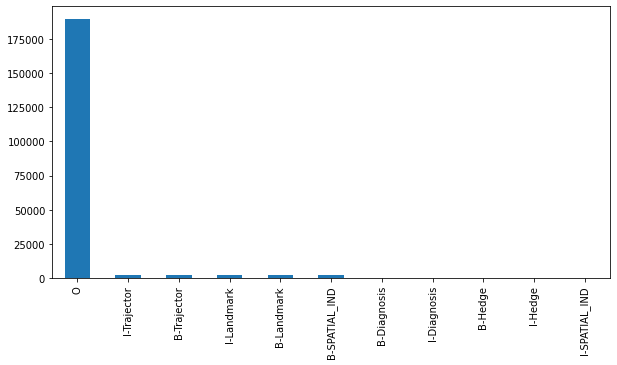

In [ ]:
df["Labels"].value_counts().plot(kind="bar", figsize=(10,5));

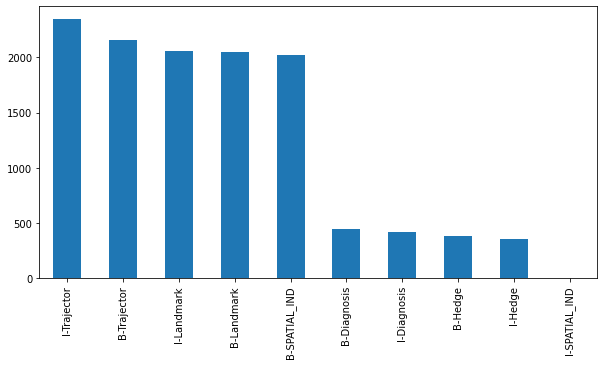

In [ ]:
df[df["Labels"]!="O"]["Labels"].value_counts().plot(kind="bar", figsize=(10,5))


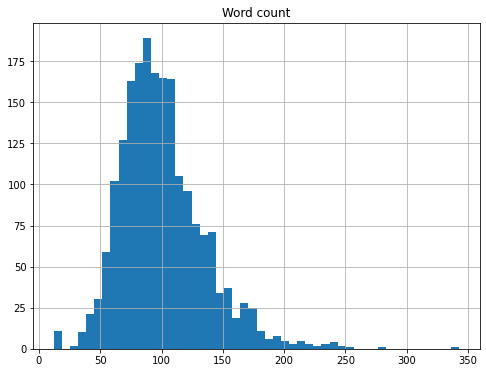

In [ ]:
word_counts = df.groupby("DocumentId")["Tokens"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Word count"})
word_counts.hist(bins=50, figsize=(8,6));

**Token2Index and Tag2Index**

In [ ]:
word2index = {}

word2index["--UNKNOWN_WORD--"] = 0

word2index["--PADDING--"] = 1

count = 2

for i, r in df.iterrows():
  if r['Tokens'] not in word2index:
    word2index[r['Tokens']] = count
    count += 1

index2word = {idx: word for word, idx in word2index.items()}

In [ ]:
len(word2index)

In [ ]:
test_word = "Exam"

test_word_idx = word2index[test_word]
test_word_lookup = index2word[test_word_idx]

print("The index of the word {} is {}.".format(test_word, test_word_idx))
print("The word with index {} is {}.".format(test_word_idx, test_word_lookup))

In [ ]:
tag2index = {}

tag2index["--PADDING--"] = 0

count = 1

for i, r in df.iterrows():
  if r['Labels'] not in tag2index:
    tag2index[r['Labels']] = count
    count += 1

index2tag = {idx: word for word, idx in tag2index.items()}

In [ ]:
len(tag2index)

In [ ]:
tag2index

In [ ]:
def to_tuples(data):
    iterator = zip(data["Tokens"].values.tolist(),
                   data["Labels"].values.tolist())
    return [(word, tag) for word, tag in iterator]

sentences = df.groupby("DocumentId").apply(to_tuples).tolist()

print(sentences[0])

In [ ]:
X = [[word[0] for word in sentence] for sentence in sentences]
y = [[word[1] for word in sentence] for sentence in sentences]
print("X[0]:", X[0])
print("y[0]:", y[0])

In [ ]:
X = [[word2index[word] for word in sentence] for sentence in X]
y = [[tag2index[tag] for tag in sentence] for sentence in y]
print("X[0]:", X[0])
print("y[0]:", y[0])

In [ ]:
X = [sentence + [word2index["--PADDING--"]] * (MAX_SENTENCE - len(sentence)) for sentence in X]
y = [sentence + [tag2index["--PADDING--"]] * (MAX_SENTENCE - len(sentence)) for sentence in y]
print("X[0]:", X[0])
print("y[0]:", y[0])

**One-Hot Encoding Labels**

In [ ]:
import numpy as np

In [ ]:
TAG_COUNT = len(tag2index)
y = [ np.eye(TAG_COUNT)[sentence] for sentence in y]
print("X[0]:", X[0])
print("y[0]:", y[0])

In [ ]:
for i in range(2000):
  for y_ar in y[i]:
    for y_i in y_ar:
      if y_i != 0 and y_i != 1:
        print(y_i)

# Bi-LSTM CRF

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

In [ ]:
!pip3 uninstall keras-nightly
!pip3 uninstall -y tensorflow
!pip3 install keras==2.1.6
!pip3 install tensorflow==1.15.0
!pip3 install h5py==2.10.0

In [ ]:
import pickle
import operator
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
# from keras_contrib.utils import save_load_utils

from keras import layers
from keras import optimizers

from keras.models import Model
from keras.layers import Input

from keras_contrib.layers import CRF
from keras_contrib import losses
from keras_contrib import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)

print("Number of documents in the training dataset: {}".format(len(X_train)))
print("Number of documents in the test dataset : {}".format(len(X_test)))

**Checking if One Hot Vector Encoding Has Been done correctly**

In [ ]:
for i in range(1800):
  for y_ar in y_train[i]:
    for y_i in y_ar:
      if y_i != 0 and y_i != 1:
        print(y_i)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
WORD_COUNT = len(index2word)
DENSE_EMBEDDING = 50
LSTM_UNITS = 500
LSTM_DROPOUT = 0.5
DENSE_UNITS = 100
BATCH_SIZE = 256
MAX_EPOCHS = 20

In [ ]:
input_layer = layers.Input(shape=(MAX_SENTENCE,))

model = layers.Embedding(WORD_COUNT, DENSE_EMBEDDING, embeddings_initializer="uniform", input_length=MAX_SENTENCE)(input_layer)

model = layers.Bidirectional(layers.LSTM(LSTM_UNITS, recurrent_dropout=LSTM_DROPOUT, return_sequences=True))(model)

# model = layers.TimeDistributed(layers.Dense(DENSE_UNITS, activation="relu"))(model)

crf_layer = CRF(units=TAG_COUNT)
output_layer = crf_layer(model)

ner_model = Model(input_layer, output_layer)

loss = losses.crf_loss
acc_metric = metrics.crf_accuracy
opt = optimizers.Adam(lr=0.01)

ner_model.compile(optimizer=opt, loss=loss, metrics=[acc_metric])

ner_model.summary()

In [ ]:
history = ner_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=MAX_EPOCHS, validation_split=0.1, verbose=2)

In [ ]:
!pip install plot-keras-history

In [ ]:
from plot_keras_history import plot_history

plot_history(history.history)

In [ ]:
y_pred = ner_model.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
y_test.shape

In [ ]:
y_pred = y_pred.astype(int)

In [ ]:
y_test = y_test.astype(int)

In [ ]:
y_pred_acc = y_pred.flatten()

In [ ]:
y_test_acc = y_test.flatten()

In [ ]:
y_pred_acc.shape

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
print('Precision: %.3f' % precision_score(y_test_acc, y_pred_acc))

In [ ]:
print('Recall: %.3f' % recall_score(y_test_acc, y_pred_acc))

In [ ]:
print('F1: %.3f' % f1_score(y_test_acc, y_pred_acc))

It appears that the model is doing quite well, however this is slightly misleading. This is a highly imbalanced dataset because of the very high number of O-tags that are present in the training and test data. 

In [ ]:
index2tag

**Random sentence Test**

In [ ]:
sentence = "There are emphysematous changes, particularly within the right upper lobe."

In [ ]:
re_tok = re.compile(f"([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])")
sentence = re_tok.sub(r"  ", sentence).split()

padded_sentence = sentence + [word2index["--PADDING--"]] * (MAX_SENTENCE - len(sentence))
padded_sentence = [word2index.get(w, 0) for w in padded_sentence]

In [ ]:
padded_sentence

In [ ]:
pred = ner_model.predict(np.array([padded_sentence]))
pred = np.argmax(pred, axis=-1)

In [ ]:
pred

In [ ]:
retval = ""
for w, p in zip(sentence, pred[0]):
    retval = retval + "{:15}: {:5}".format(w, index2tag[p]) + "\n"
print(retval)

In [ ]:
sentence = "A well circumscribed hypodense 1 cm lesion is seen in the right cerebellar hemisphere consistent with prior stroke."

In [ ]:
re_tok = re.compile(f"([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])")
sentence = re_tok.sub(r"  ", sentence).split()

padded_sentence = sentence + [word2index["--PADDING--"]] * (MAX_SENTENCE - len(sentence))
padded_sentence = [word2index.get(w, 0) for w in padded_sentence]

pred = ner_model.predict(np.array([padded_sentence]))
pred = np.argmax(pred, axis=-1)

retval = ""
for w, p in zip(sentence, pred[0]):
    retval = retval + "{:15}: {:5}".format(w, index2tag[p]) + "\n"
print(retval)

In [ ]:
sentence = "Stable peripheral right lower lobe opacities seen between the anterior 7th and 8th right ribs which may represent pleural reaction or small pulmonary nodules."

In [ ]:
re_tok = re.compile(f"([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])")
sentence = re_tok.sub(r"  ", sentence).split()

padded_sentence = sentence + [word2index["--PADDING--"]] * (MAX_SENTENCE - len(sentence))
padded_sentence = [word2index.get(w, 0) for w in padded_sentence]

pred = ner_model.predict(np.array([padded_sentence]))
pred = np.argmax(pred, axis=-1)

retval = ""
for w, p in zip(sentence, pred[0]):
    retval = retval + "{:15}: {:5}".format(w, index2tag[p]) + "\n"
print(retval)